# Commit Embedding Clusters Visualization

This projects compresses information contained in the embedding vector of commit messages generated by a commit classification model using MLP and visualizes the processed vectors.

In [20]:
## Installing 
!pip install torch
!pip install numpy
!pip install matplotlib seaborn scikit-learn



  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 61.8 MB/s eta 0:00:00
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 77.5 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 77.8 MB/s eta 0:00:00
Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl (11.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 88.6 MB/s eta 0:00:00
Using cached pyparsing-3.2.3-py3-none

## Initialization

Initializing MLP network and load embedding vectors

In [26]:
import torch
import torch.nn as nn
import numpy as np

mlp = nn.Sequential(
    nn.Linear(768, 512),
    nn.BatchNorm1d(512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    nn.Linear(256, 64)
)

In [27]:
npy_path = 'embedding/embeddings.npy'
embeddings = np.load(npy_path)

embeddings.shape

(10741, 768)

convert embeddings to PyTorch tensor

In [28]:
embeddings_tensor = torch.from_numpy(embeddings).float()

## Feed Embeddings through MLP

In [30]:
with torch.no_grad():
    compressed_embeddings = mlp(embeddings_tensor)
compressed_embeddings.shape
## Clustering






torch.Size([10741, 64])

## Visualization using t-SNE

/var/folders/hq/mr_d9f8x11dfzc_f03z9xzbw0000gn/T/ipykernel_7901/1117873560.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=embeddings_2d[:, 0],
/var/folders/hq/mr_d9f8x11dfzc_f03z9xzbw0000gn/T/ipykernel_7901/1117873560.py:27: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=initial_embeddings_2d[:, 0],


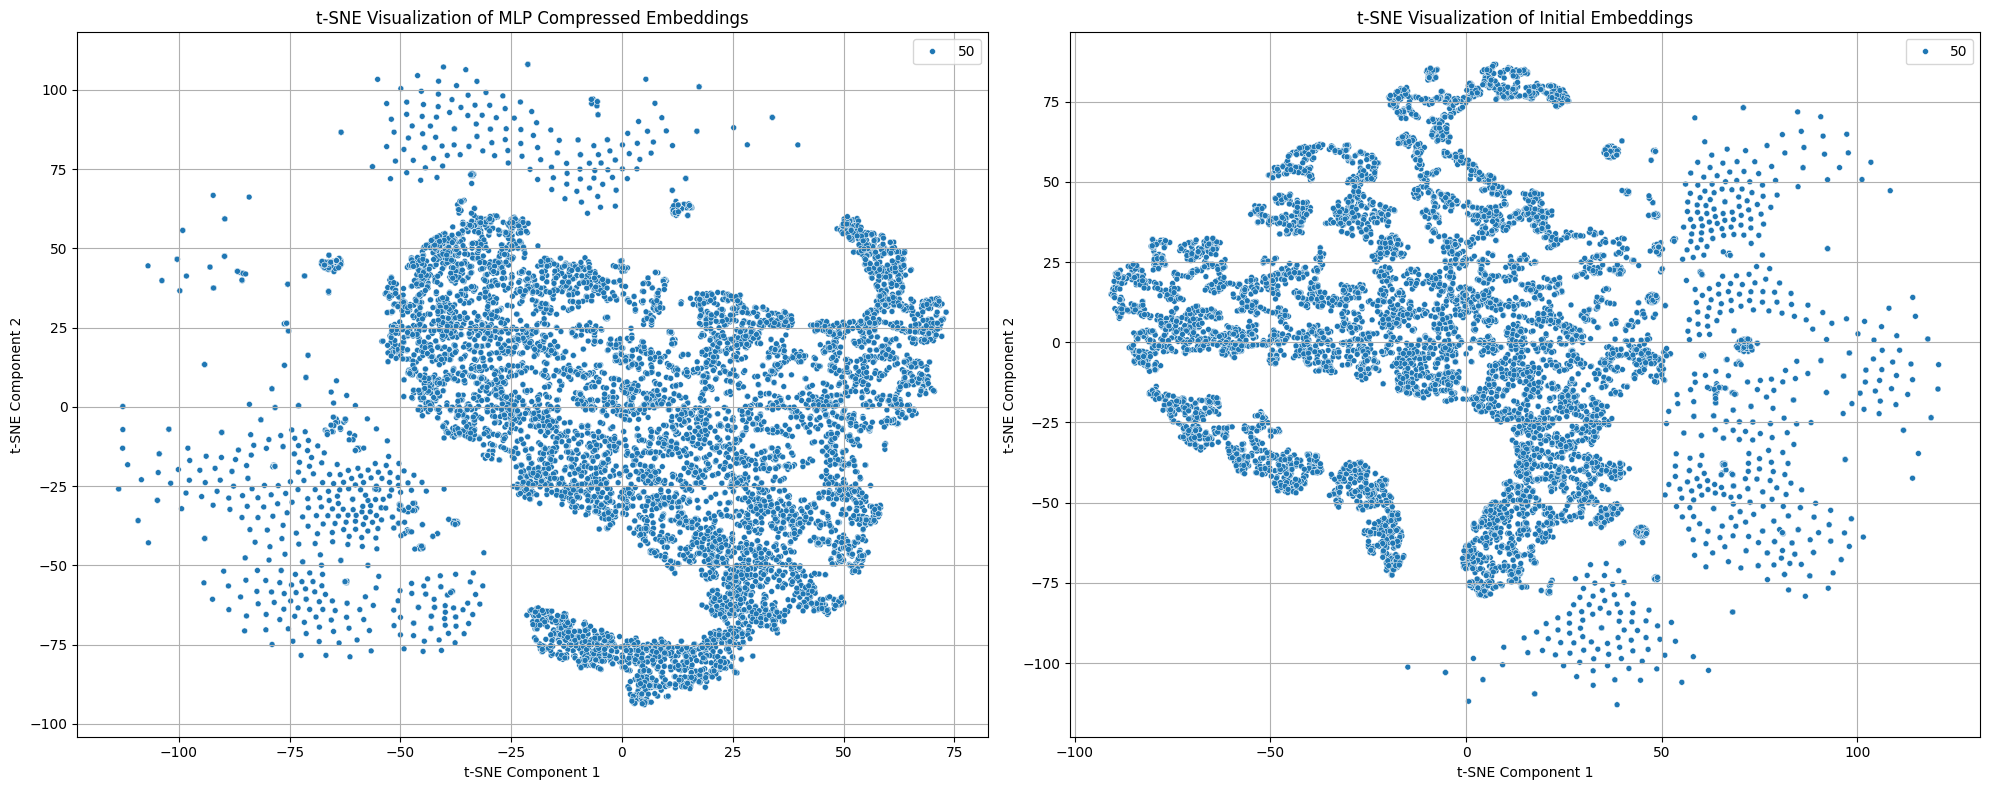

In [34]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Reduce the dimensions of the compressed embeddings to 2D
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(compressed_embeddings)

# Plot compressed embeddings
sns.scatterplot(x=embeddings_2d[:, 0], 
                y=embeddings_2d[:, 1], 
                palette='viridis',
                size=50,
                ax=ax1)
ax1.set_title('t-SNE Visualization of MLP Compressed Embeddings')
ax1.set_xlabel('t-SNE Component 1')
ax1.set_ylabel('t-SNE Component 2')
ax1.grid(True)

# Plot initial embeddings
initial_tsne = TSNE(n_components=2, random_state=42)
initial_embeddings_2d = initial_tsne.fit_transform(embeddings_tensor)

sns.scatterplot(x=initial_embeddings_2d[:, 0], 
                y=initial_embeddings_2d[:, 1], 
                palette='coral',
                size=50,
                ax=ax2)
ax2.set_title('t-SNE Visualization of Initial Embeddings')
ax2.set_xlabel('t-SNE Component 1')
ax2.set_ylabel('t-SNE Component 2')
ax2.grid(True)

plt.tight_layout()
plt.show()

In [35]:
# Save compressed embeddings
compressed_embeddings_np = compressed_embeddings.numpy()
np.save('embedding/compressed_embeddings.npy', compressed_embeddings_np)

